In [29]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Scikit-learn utilities
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [30]:
import pandas as pd

# Load training data
train_path = "../data/train.csv"
df = pd.read_csv(train_path)

# Basic structure and first look
display(df.head())
print("\nDataFrame info:\n")
df.info()

print("\nDescriptive statistics for numeric columns:\n")
display(df.describe())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



DataFrame info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [31]:
# Identify numeric vs categorical columns and missing values

numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=["number"]).columns.tolist()

print("Numeric columns ({}):".format(len(numeric_cols)))
print(numeric_cols)

print("\nCategorical columns ({}):".format(len(categorical_cols)))
print(categorical_cols)

print("\nMissing values per column:")
missing_counts = df.isna().sum().sort_values(ascending=False)
display(missing_counts.to_frame(name="n_missing"))

Numeric columns (38):
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Categorical columns (43):
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', '

,n_missing
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


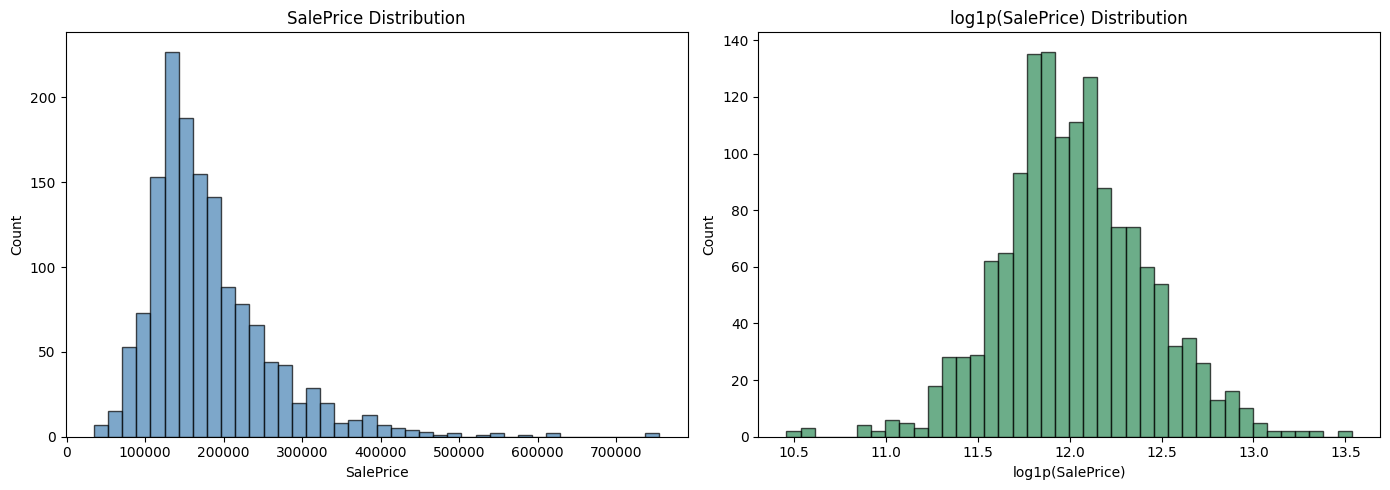

In [32]:
# Target distribution: SalePrice
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df["SalePrice"], bins=40, color="steelblue", edgecolor="black", alpha=0.7)
axes[0].set_title("SalePrice Distribution")
axes[0].set_xlabel("SalePrice")
axes[0].set_ylabel("Count")

axes[1].hist(np.log1p(df["SalePrice"]), bins=40, color="seagreen", edgecolor="black", alpha=0.7)
axes[1].set_title("log1p(SalePrice) Distribution")
axes[1].set_xlabel("log1p(SalePrice)")
axes[1].set_ylabel("Count")

plt.tight_layout()

C:\Users\Eric\AppData\Local\Temp\ipykernel_42400\2152851445.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_neighborhood, labels=top_neighborhoods, showfliers=True)
C:\Users\Eric\AppData\Local\Temp\ipykernel_42400\2152851445.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_bin, labels=bin_order)


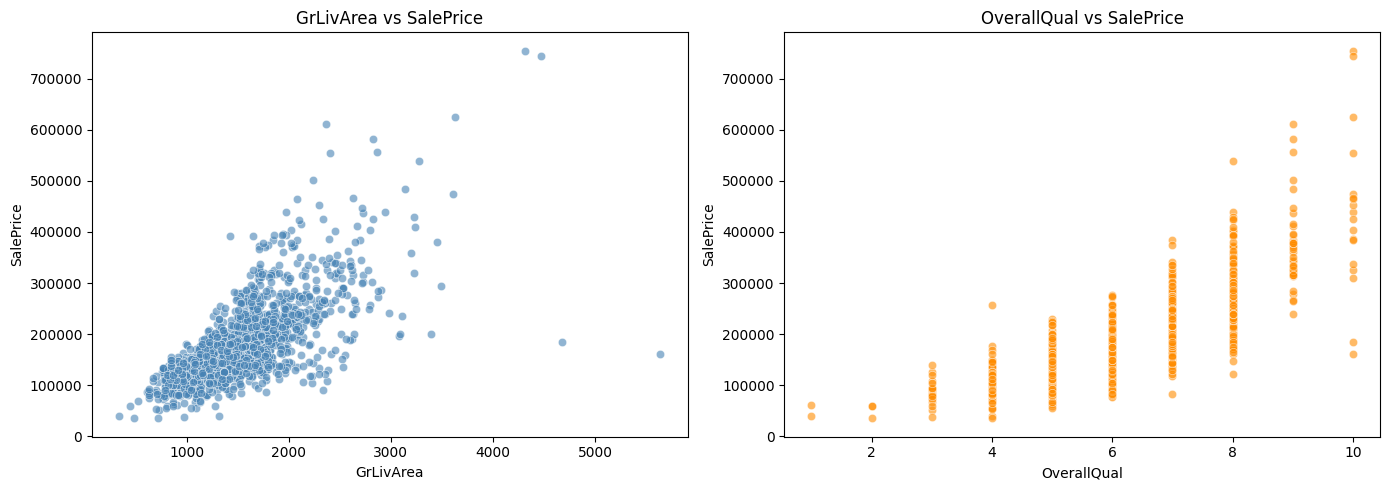

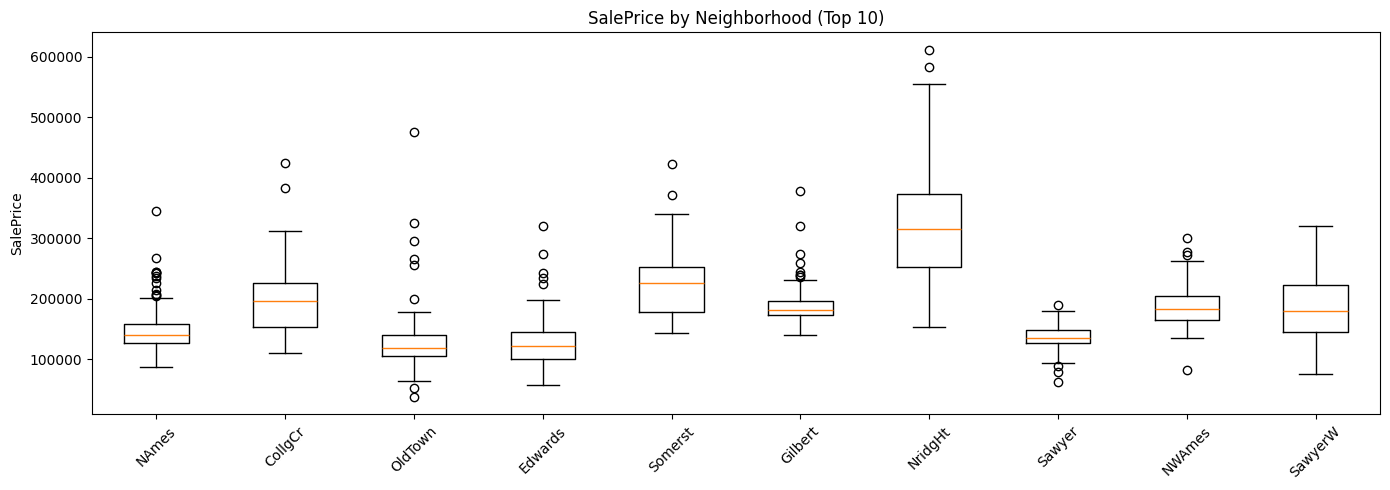

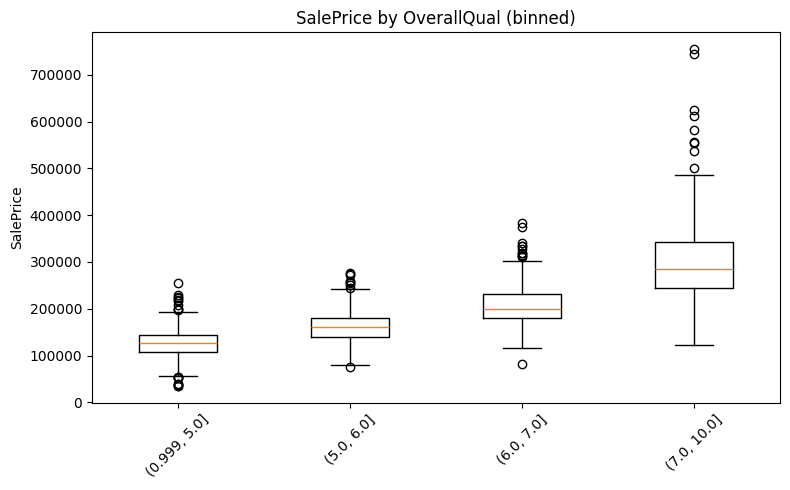

In [33]:
# Key feature relationships with SalePrice

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# GrLivArea vs SalePrice
axes[0].scatter(df["GrLivArea"], df["SalePrice"], alpha=0.6, color="steelblue", edgecolors="white", linewidths=0.5)
axes[0].set_title("GrLivArea vs SalePrice")
axes[0].set_xlabel("GrLivArea")
axes[0].set_ylabel("SalePrice")

# OverallQual vs SalePrice
axes[1].scatter(df["OverallQual"], df["SalePrice"], alpha=0.6, color="darkorange", edgecolors="white", linewidths=0.5)
axes[1].set_title("OverallQual vs SalePrice")
axes[1].set_xlabel("OverallQual")
axes[1].set_ylabel("SalePrice")

plt.tight_layout()

# Boxplots for categoricals vs target
plt.figure(figsize=(14, 5))

# Neighborhood vs SalePrice (top 10 most frequent neighborhoods)
top_neighborhoods = df["Neighborhood"].value_counts().head(10).index
subset = df[df["Neighborhood"].isin(top_neighborhoods)]

# Prepare data for boxplot: list of arrays, one per neighborhood
data_by_neighborhood = [subset[subset["Neighborhood"] == n]["SalePrice"].values for n in top_neighborhoods]
plt.boxplot(data_by_neighborhood, labels=top_neighborhoods, showfliers=True)
plt.title("SalePrice by Neighborhood (Top 10)")
plt.xticks(rotation=45)
plt.ylabel("SalePrice")
plt.tight_layout()

# OverallQual binned vs SalePrice
plt.figure(figsize=(8, 5))
overallqual_bins = pd.qcut(df["OverallQual"], q=4, duplicates="drop")
bin_order = [str(cat) for cat in overallqual_bins.cat.categories]
df["OverallQual_bin"] = overallqual_bins.astype(str)

data_by_bin = [df[df["OverallQual_bin"] == label]["SalePrice"].values for label in bin_order]
plt.boxplot(data_by_bin, labels=bin_order)
plt.title("SalePrice by OverallQual (binned)")
plt.xticks(rotation=45)
plt.ylabel("SalePrice")
plt.tight_layout()

Top 10 features most positively correlated with SalePrice:

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Top 10 features most negatively correlated with SalePrice:

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


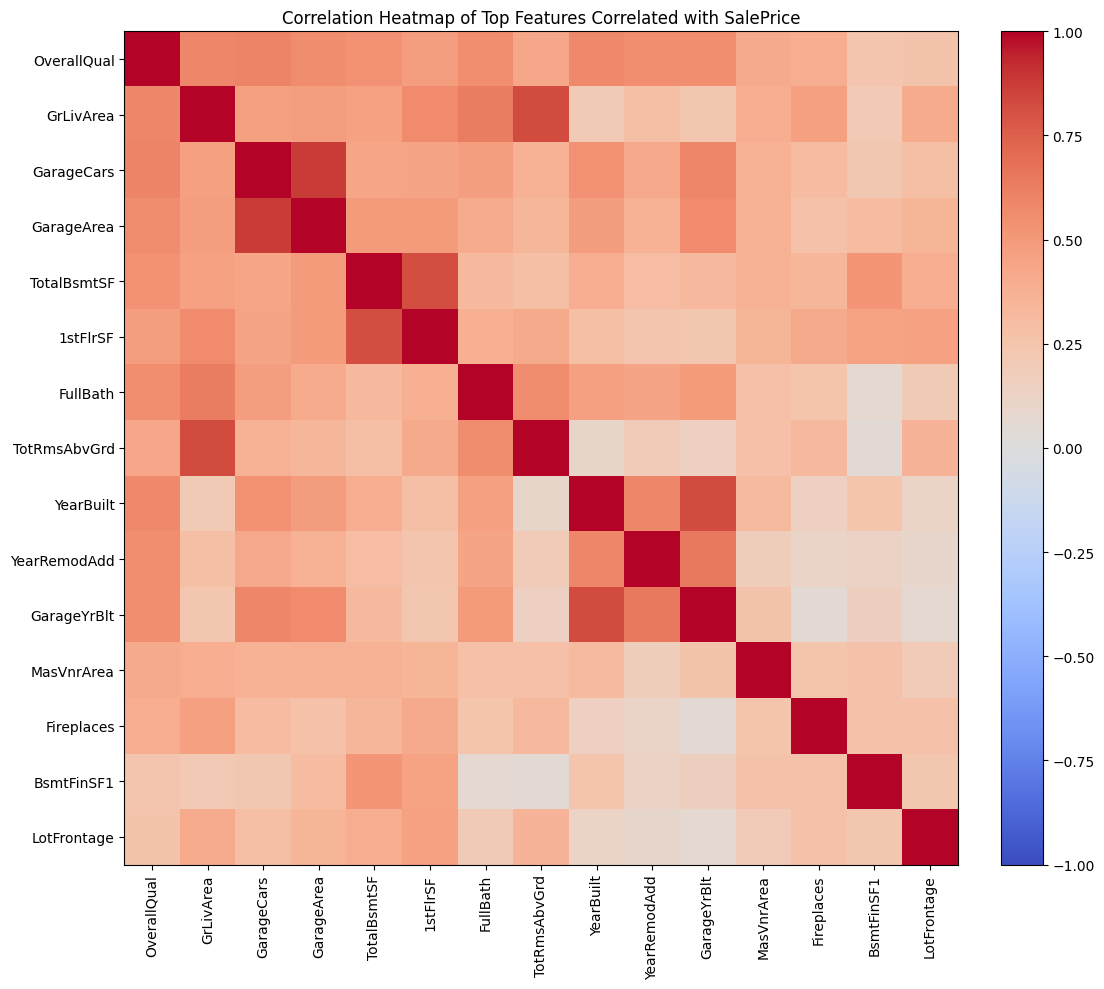

In [34]:
# Correlation matrix and top correlated features with SalePrice

# Compute correlations on numeric features only
numeric_df = df.select_dtypes(include=["number"])

corr_matrix = numeric_df.corr()

# Select top 15 features most correlated (absolute) with SalePrice
corr_target = corr_matrix["SalePrice"].drop("SalePrice").sort_values(ascending=False)
top_features = corr_target.head(15).index

# Simple heatmap using Matplotlib
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.imshow(corr_matrix.loc[top_features, top_features], cmap="coolwarm", vmin=-1, vmax=1)
ax.set_xticks(range(len(top_features)))
ax.set_yticks(range(len(top_features)))
ax.set_xticklabels(top_features, rotation=90)
ax.set_yticklabels(top_features)
fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
ax.set_title("Correlation Heatmap of Top Features Correlated with SalePrice")
plt.tight_layout()

print("Top 10 features most positively correlated with SalePrice:\n")
print(corr_target.head(10))

print("\nTop 10 features most negatively correlated with SalePrice:\n")
print(corr_target.tail(10))

# Conclusion

(a) **Shape of the target (SalePrice)**  
The target variable `SalePrice` is right-skewed, with a long tail of expensive houses. This suggests that applying a log transformation to `SalePrice` may help stabilize variance and make linear model assumptions more reasonable. After applying `log1p(SalePrice)`, the distribution becomes approximately symmetric and closer to normal, which is desirable for many regression models.

(b) **Important relationships (features vs target)**  
Several features show strong relationships with `SalePrice`, including `OverallQual`, `GrLivArea`, and other size/quality measures such as `GarageCars` and `TotalBsmtSF`. Houses with higher overall quality or larger living area tend to have substantially higher sale prices, as seen in both the scatterplots and the correlation matrix. Categorical features like `Neighborhood` and binned `OverallQual` exhibit clear differences in average sale price across categories, motivating one-hot encoding (or similar encoding) for these variables.

(c) **Outliers**  
We observe some potential outliers, particularly houses with very large `GrLivArea` and unusually high sale prices. These points may have disproportionate influence on certain models. In later stages, we will consider either removing these outliers, capping them, or relying on more robust models/transformations to reduce their impact.

(d) **Missingness and data quality**  
Several features contain missing values, especially basement-, garage-, and fireplace-related variables. In many of these cases, missing values likely indicate the absence of that feature (e.g., no basement, no garage), suggesting the use of explicit “None” categories or zero-valued imputation rather than dropping rows. Overall, most numeric variables have relatively few missing entries, so simple mean/median imputation should be sufficient for them during preprocessing.

In [35]:
# Preprocessing: log-transform, imputation, scaling, and one-hot encoding


# 1) Log-transform the target and selected skewed numeric predictors
df["SalePrice_log"] = np.log1p(df["SalePrice"])


# Identify numeric and categorical columns (reuse lists from earlier cell if available)
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=["number"]).columns.tolist()


# Optionally, select skewed numeric predictors to log-transform (excluding the target)
skew_threshold = 0.75
numeric_predictors = [col for col in numeric_cols if col != "SalePrice" and col != "SalePrice_log"]
skewness = df[numeric_predictors].skew().sort_values(ascending=False)
skewed_features = skewness[abs(skewness) > skew_threshold].index.tolist()


for col in skewed_features:
    df[col + "_log"] = np.log1p(df[col].clip(lower=0))  # guard against negatives


print("Log-transformed target and {} skewed predictors.".format(len(skewed_features)))

Log-transformed target and 21 skewed predictors.


In [36]:
# 2) Define preprocessing for numeric and categorical features


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Identify feature columns (exclude target and its log)
feature_columns = df.columns.drop(["SalePrice", "SalePrice_log"], errors="ignore")


# Numeric features: median imputation + standardization
numeric_features = df[feature_columns].select_dtypes(include=["number"]).columns.tolist()


numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


# Categorical features: impute missing with most frequent and one-hot encode
categorical_features = df[feature_columns].select_dtypes(include=["object", "category"]).columns.tolist()


categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


# Combine into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


print("Numeric features ({}):".format(len(numeric_features)))
print(numeric_features)


print("\nCategorical features ({}):".format(len(categorical_features)))
print(categorical_features)

Numeric features (58):
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MiscVal_log', 'PoolArea_log', 'LotArea_log', '3SsnPorch_log', 'LowQualFinSF_log', 'KitchenAbvGr_log', 'BsmtFinSF2_log', 'ScreenPorch_log', 'BsmtHalfBath_log', 'EnclosedPorch_log', 'MasVnrArea_log', 'OpenPorchSF_log', 'LotFrontage_log', 'BsmtFinSF1_log', 'WoodDeckSF_log', 'TotalBsmtSF_log', 'MSSubClass_log', '1stFlrSF_log', 'GrLivArea_log', 'BsmtUnfSF_log', '2ndFlrSF_log']

Categorical features (44):
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilit

In [37]:
# 3) Fit the preprocessing pipeline on the training data


# Use the log-transformed target for modeling
y = df["SalePrice_log"]
X = df.drop(columns=["SalePrice", "SalePrice_log"])


X_processed = preprocessor.fit_transform(X)


print("Preprocessed feature matrix shape:", X_processed.shape)

Preprocessed feature matrix shape: (1460, 313)
